In [280]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None

In [281]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Syukrondzeko/Fellowship-5/main/epl_1819.csv')

In [282]:
dataset.head()

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,72,98,25,27.1,20,1003200000,39987200,"26,581",112,"1,814","4,240",783,298,683,260,12,3,80,15,44,1,5,2,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,67,97,24,26.8,16,836440000,34848000,"23,638",98,"2,250","3,416",721,249,575,226,19,7,84,5,38,2,6,1,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,39,24,72,26,28.1,19,779460000,29981600,"25,070",146,"1,774","3,874",692,215,607,198,8,5,54,9,49,0,1,1,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,39,28,71,25,27.0,17,735240000,29409600,"21,295",87,"2,267","3,191",643,194,537,189,14,4,53,14,56,3,5,2,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,51,22,70,26,27.5,18,701800000,26989600,"20,805",65,"2,062","3,102",605,209,467,170,5,4,62,11,72,2,3,3,133,118,412,609,2,762,404,7,56.1,83.3


In [283]:
dataset.dtypes

Team                              object
category                          object
general_league_position            int64
finance _live_games_televised      int64
finance _tv_revenue                int64
general_matches_played             int64
general_won                        int64
general_draw                       int64
general_lost                       int64
attack_scored                      int64
defence_goals_conceeded            int64
general_goal_difference            int64
general_points                     int64
general_squad_size                 int64
general_squad_average_age        float64
general_squad_foreigners           int64
finance _team_market               int64
finance _market_average            int64
attack_passes                     object
attack_passes_through              int64
attack_passes_long                object
attack_passes_back                object
attack_crosses                     int64
attack_corners_taken               int64
attack_shots    

Melihat dan observasi tipe data Object

In [284]:
checkDataset = dataset.iloc[:, 2:].select_dtypes(include=['object']).columns
for item in checkDataset:
  print('Column Name: ', item)
  print(dataset[item].tolist())

Column Name:  attack_passes
['26,581', '23,638', '25,070', '21,295', '20,805', '19,202', '16,618', '16,494', '17,219', '16,358', '15,462', '15,243', '13,490', '15,943', '13,011', '14,297', '14,109', '10,226', '17,699', '15,902']
Column Name:  attack_passes_long
['1,814', '2,250', '1,774', '2,267', '2,062', '2,242', '2,552', '2,310', '2,335', '2,315', '2,437', '2,259', '2,680', '1,932', '2,898', '2,394', '2,623', '2,513', '2,417', '2,603']
Column Name:  attack_passes_back
['4,240', '3,416', '3,874', '3,191', '3,102', '2,634', '2,515', '2,362', '2,593', '2,273', '2,314', '2,233', '1,999', '2,249', '2,046', '2,040', '2,072', '1,418', '2,750', '2,492']
Column Name:  defence_clearances
['543', '639', '593', '770', '762', '785', '824', '825', '945', '855', '956', '940', '1,120', '1,019', '1,080', '1,068', '921', '978', '971', '658']


Tipe Data Object seharusnya merupakan integer, tipe data tersebut menjadi object dikarenakan adanya ',' pada data tersebut. Sehingga perlu dihilangkan juga

In [285]:
for item in checkDataset:
  dataset[item] = dataset[item].replace(to_replace=r',', value='', regex=True)
  dataset[item] = dataset[item].astype('int64')

Cek Tipe Data Float dan ternyata tidak ada yang aneh

In [286]:
checkDataset = dataset.iloc[:, 2:].select_dtypes(include=['float64']).columns
for item in checkDataset:
  print('Column Name: ', item)
  print(dataset[item].tolist())

Column Name:  general_squad_average_age
[27.1, 26.8, 28.1, 27.0, 27.5, 27.3, 27.2, 27.0, 29.0, 28.3, 26.8, 26.8, 26.1, 26.2, 27.3, 28.0, 28.4, 29.7, 26.7, 28.5]
Column Name:  attack_posession
[64.0, 58.8, 59.9, 56.7, 56.1, 53.3, 47.4, 51.0, 50.8, 49.0, 47.4, 46.6, 42.9, 47.7, 43.4, 45.4, 44.1, 39.1, 49.2, 47.1]
Column Name:  attack_pass_accuracy
[89.0, 84.4, 87.6, 83.2, 83.3, 82.3, 78.2, 77.3, 79.2, 78.7, 76.1, 76.8, 72.9, 78.1, 70.3, 74.0, 74.8, 63.9, 80.3, 75.8]


Cek tipe data int dan ternyata tidak ada data yang aneh

In [287]:
checkDataset = dataset.iloc[:, 2:].select_dtypes(include=['int64']).columns
for item in checkDataset:
  print('Column Name: ', item)
  print(dataset[item].tolist())

Column Name:  general_league_position
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Column Name:  finance _live_games_televised
[26, 29, 25, 26, 25, 27, 15, 18, 15, 16, 10, 12, 19, 10, 11, 10, 13, 12, 13, 10]
Column Name:  finance _tv_revenue
[150986355, 152425146, 146030216, 145230801, 142193180, 142512868, 127165114, 128603905, 123328078, 122528663, 113895527, 114215215, 120130418, 108139973, 107340558, 104302937, 105741728, 102704107, 101904692, 96628865]
Column Name:  general_matches_played
[38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38]
Column Name:  general_won
[32, 30, 21, 23, 21, 19, 16, 15, 15, 15, 14, 14, 12, 13, 11, 9, 9, 10, 7, 3]
Column Name:  general_draw
[2, 7, 9, 2, 7, 9, 9, 9, 7, 7, 8, 7, 9, 6, 7, 12, 9, 4, 5, 7]
Column Name:  general_lost
[4, 1, 8, 13, 10, 10, 13, 14, 16, 16, 16, 17, 17, 19, 20, 17, 20, 24, 26, 28]
Column Name:  attack_scored
[95, 89, 63, 67, 73, 65, 47, 54, 51, 52, 52, 51, 42, 56, 45, 45, 35,

Jika ingin melakukan test outliers 1 per 1

In [288]:
def checkPlotOutliers (columns):
  plt.figure(figsize=(4,4))
  plt.title(columns)
  ax = sns.boxplot(data=dataset, x=columns)
  Q1 = np.percentile(dataset[columns], 25, interpolation = 'midpoint') 
  Q3 = np.percentile(dataset[columns], 75, interpolation = 'midpoint') 
  IQR = Q3 - Q1 
  lowerBound = Q1 - (1.5 * IQR)
  upperBound = Q3 + (1.5 * IQR)
  plt.show()
  print('Outliers')
  print('Upper: ', dataset[dataset[columns] > upperBound][['Team', columns]])
  print('Lower: ', dataset[dataset[columns] < lowerBound][['Team', columns]])
  print('\n')

In [289]:
# for columns in dataset.iloc[:, 3:].columns:
#   checkPlotOutliers(columns)

In [290]:
# cFloat = dataset.select_dtypes(include=['float64']).columns
# for item in cFloat:
#     plt.figure(figsize=(4,4))
#     ax = sns.displot(data=dataset, x=item, kde=True)
#     plt.show()

**Soal 2**

---




Skewness Value:  0.5631636182874602


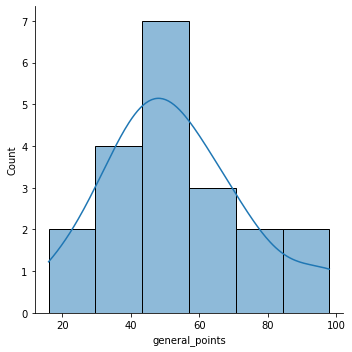

In [291]:
ax = sns.displot(data=dataset, x='general_points', kde=True)
print('Skewness Value: ', skew(dataset.general_points))

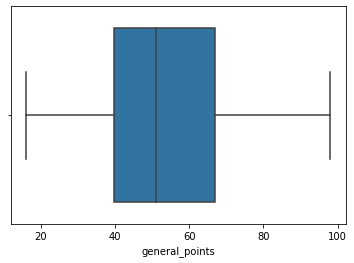

In [350]:
ax = sns.boxplot(data=dataset, x='general_points')

**Soal 3**

---



In [337]:
dataset.iloc[:, [0,9]].head(2)

,Team,attack_scored
0,Manchester City,95
1,Liverpool,89


In [308]:
dataset[['Team', 'attack_scored', 'attack_shots', 'attack_shots_on_target', 'attack_posession', 'attack_pass_accuracy']].corr()

,attack_scored,attack_shots,attack_shots_on_target,attack_posession,attack_pass_accuracy
attack_scored,1.000000,0.804922,0.889678,0.849823,0.751870
attack_shots,0.804922,1.000000,0.929259,0.865745,0.799261
attack_shots_on_target,0.889678,0.929259,1.000000,0.870274,0.801613
attack_posession,0.849823,0.865745,0.870274,1.000000,0.951080
attack_pass_accuracy,0.751870,0.799261,0.801613,0.951080,1.000000


In [343]:
dfAttack = dataset[['Team', 'attack_shots', 'attack_shots_on_target', 'attack_posession', 'attack_pass_accuracy']]
# Hitung efisiensi Penyerangan
# Jumlah Gol yang didapatkan / Berapa usahanya
for i in range (1, len(dfAttack.columns)):
  dfAttack.iloc[:, i] = dataset.iloc[:, 9]/dfAttack.iloc[:, i]
dfAttack.iloc[:, 1:] = MinMaxScaler().fit_transform(dfAttack.iloc[:, 1:])
# Dikurangi 1 dikarenakan tidak menghitung kolom Team
dfAttack['Overall Attack'] = dfAttack.iloc[:, 1:].sum(axis=1)/ (len(dfAttack.columns)-1)
dfAttack.head()

,Team,attack_shots,attack_shots_on_target,attack_posession,attack_pass_accuracy,Overall Attack
0,Manchester City,0.829992,0.736482,0.972069,1.000000,0.884636
1,Liverpool,0.984856,0.853454,1.000000,0.983384,0.955424
2,Chelsea,0.481550,0.542209,0.558675,0.551920,0.533589
3,Tottenham,0.688604,0.691674,0.682806,0.662719,0.681451
4,Arsenal,1.000000,1.000000,0.797081,0.754155,0.887809


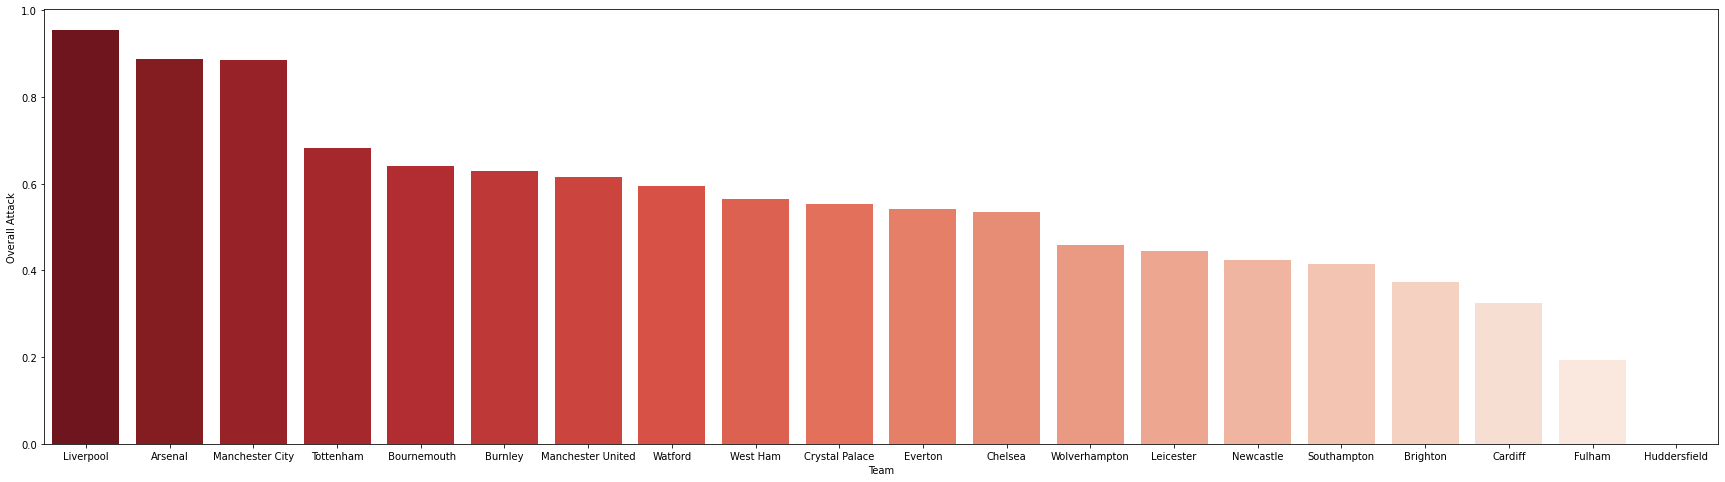

In [331]:
plt.figure(figsize=(30,8))
sns.barplot(x='Team', y='Overall Attack', data=dfAttack.sort_values(by=['Overall Attack'], ascending=False), palette="Reds_r")
plt.show()

**Soal 4**

---



In [338]:
dataset.iloc[:, [0,10]].head(2)

,Team,defence_goals_conceeded
0,Manchester City,23
1,Liverpool,22


In [309]:
dataset[['Team', 'defence_goals_conceeded', 'defence_saves' , 'defence_blocks', 'defence_interceptions', 'defence_tackles', 'defence_clearances']].corr()

,defence_goals_conceeded,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_clearances
defence_goals_conceeded,1.000000,0.745762,0.718916,0.504485,0.124210,0.604531
defence_saves,0.745762,1.000000,0.679629,0.236492,0.122314,0.494461
defence_blocks,0.718916,0.679629,1.000000,0.328522,0.138578,0.720106
defence_interceptions,0.504485,0.236492,0.328522,1.000000,0.723663,0.433340
defence_tackles,0.124210,0.122314,0.138578,0.723663,1.000000,0.249393
defence_clearances,0.604531,0.494461,0.720106,0.433340,0.249393,1.000000


In [346]:
dfDeff = dataset[['Team', 'defence_saves' , 'defence_blocks', 'defence_interceptions', 'defence_tackles', 'defence_clearances']]
# Hitung efisiensi Pertahanan
# Jumlah aktifitas yang dilakukan / Berapa kali kebobolan
for i in range (1, len(dfDeff.columns)):
  dfDeff.iloc[:, i] = dfDeff.iloc[:, i]/dataset.iloc[:, 10]
dfDeff.iloc[:, 1:] = MinMaxScaler().fit_transform(dfDeff.iloc[:, 1:])
# Dikurangi 1 dikarenakan tidak menghitung kolom Team
dfDeff['Overall Defence'] = dfDeff.iloc[:, 1:].sum(axis=1)/ (len(dfDeff.columns)-1)
dfDeff.head()

,Team,defence_saves,defence_blocks,defence_clearances,Overall Defence
0,Manchester City,0.522750,0.560569,0.733330,0.605550
1,Liverpool,1.000000,1.000000,1.000000,1.000000
2,Chelsea,0.347645,0.087888,0.321139,0.252224
3,Tottenham,0.819917,0.632869,0.543748,0.665511
4,Arsenal,0.566803,0.328732,0.308192,0.401242


In [335]:
dfDeff.corr()

,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_clearances,Overall Defence
defence_saves,1.000000,0.573556,0.540943,0.736345,0.642898,0.815016
defence_blocks,0.573556,1.000000,0.435165,0.518899,0.645316,0.756677
defence_interceptions,0.540943,0.435165,1.000000,0.928159,0.812730,0.859415
defence_tackles,0.736345,0.518899,0.928159,1.000000,0.869177,0.937918
defence_clearances,0.642898,0.645316,0.812730,0.869177,1.000000,0.919546
Overall Defence,0.815016,0.756677,0.859415,0.937918,0.919546,1.000000


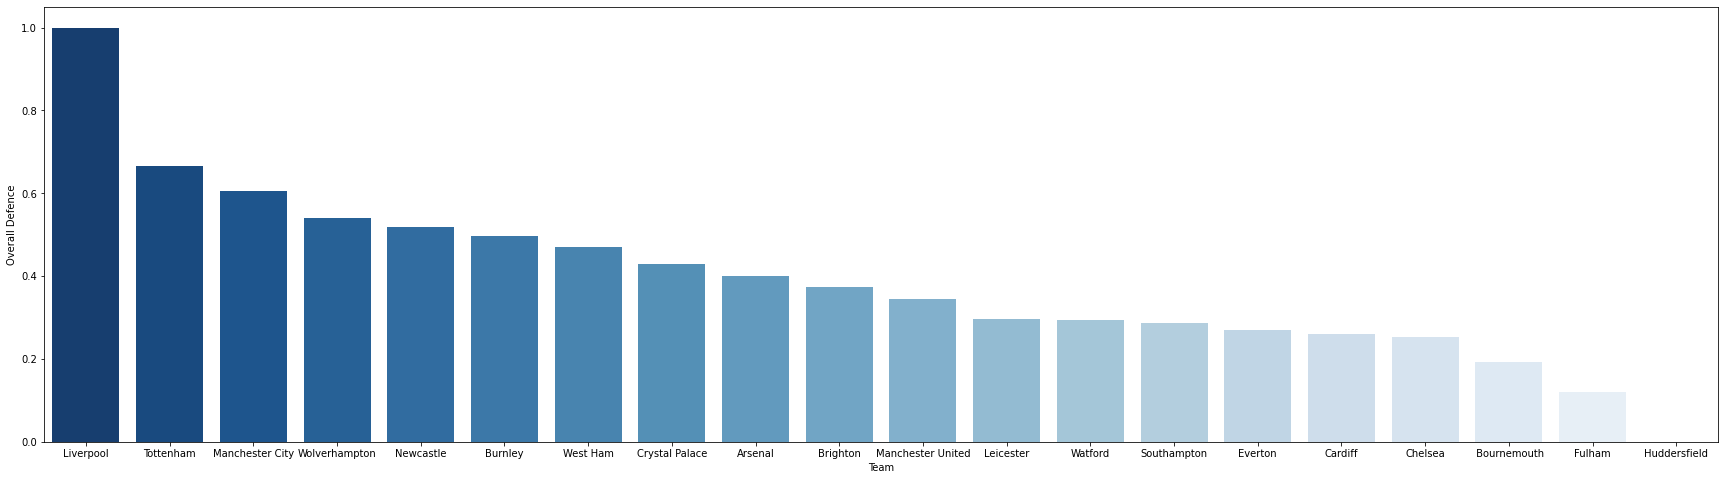

In [347]:
plt.figure(figsize=(30,8))
sns.barplot(x='Team', y='Overall Defence', data=dfDeff.sort_values(by=['Overall Defence'], ascending=False), palette="Blues_r")
plt.show()

**Soal 5**

---



In [302]:
dataset.iloc[:, [0,3]].head(1)

,Team,finance _live_games_televised
0,Manchester City,26


In [344]:
dfFinance = dataset[['Team', 'finance _tv_revenue', 'finance _team_market', 'finance _market_average']]
# Hitung efisiensi live dari televisi dengan perhitungan
# Jumlah Tayangan / Pendapatan
dfFinance.iloc[:, 1] = dataset.iloc[:, 3]/dfFinance.iloc[:, 1]
dfFinance.iloc[:, 1:] = MinMaxScaler().fit_transform(dfFinance.iloc[:, 1:])
# Dikurangi 1 dikarenakan tidak menghitung kolom Team
dfFinance['Overall Finance'] = dfFinance.iloc[:, 1:].sum(axis=1)/ (len(dfFinance.columns)-1)
dfFinance.head()


,Team,finance _tv_revenue,finance _team_market,finance _market_average,Overall Finance
0,Manchester City,0.823768,1.000000,1.000000,0.941256
1,Liverpool,1.000000,0.818286,0.860853,0.893046
2,Chelsea,0.813973,0.756197,0.729092,0.766421
3,Tottenham,0.890375,0.708012,0.713605,0.770664
4,Arsenal,0.859062,0.671573,0.648082,0.726239


In [345]:
dfFinance.corr()

,finance _tv_revenue,finance _team_market,finance _market_average,Overall Finance
finance _tv_revenue,1.000000,0.823792,0.835208,0.926907
finance _team_market,0.823792,1.000000,0.997373,0.975931
finance _market_average,0.835208,0.997373,1.000000,0.980130
Overall Finance,0.926907,0.975931,0.980130,1.000000


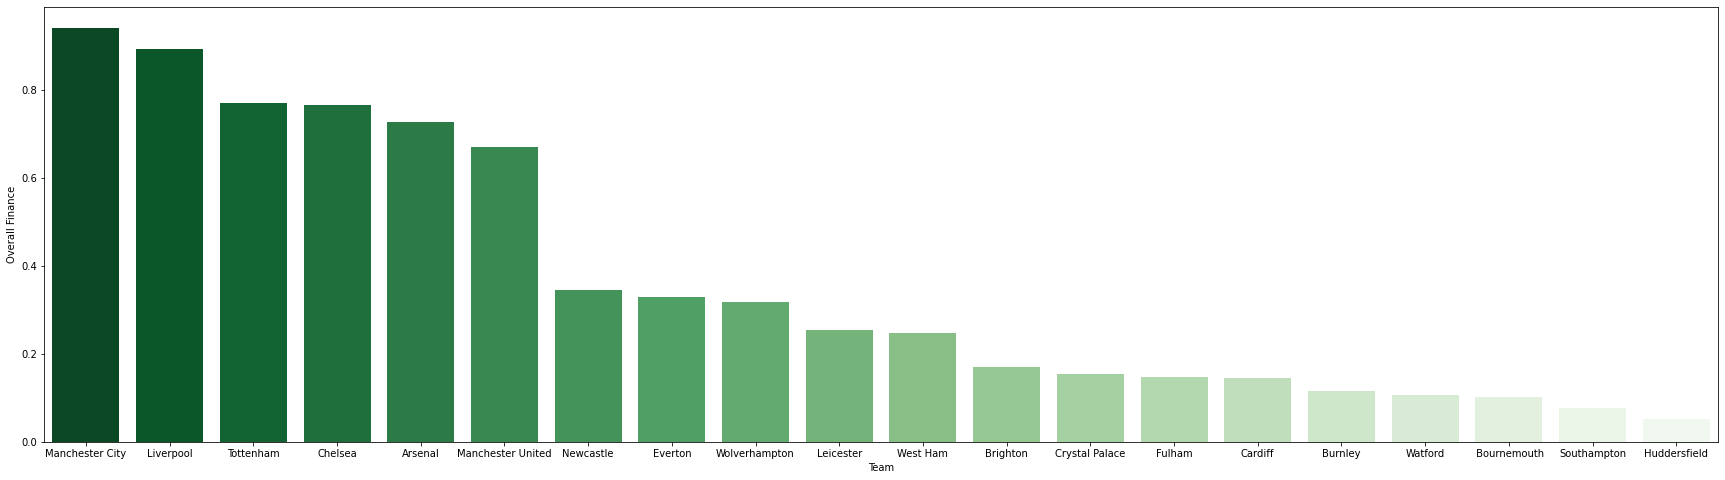

In [304]:
plt.figure(figsize=(30,8))
sns.barplot(x='Team', y='Overall Finance', data=dfFinance.sort_values(by=['Overall Finance'], ascending=False), palette="Greens_r")
plt.show()

In [357]:
dfCreatifity = pd.merge(dfAttack, dfDeff, how = 'inner', on = 'Team')
dfCreatifity = dfCreatifity[['Team', 'Overall Attack', 'Overall Defence']]
dfCreatifity['general_league_position'] = dataset['general_league_position']
dfCreatifity

,Team,Overall Attack,Overall Defence,general_league_position
0,Manchester City,0.884636,0.605550,1
1,Liverpool,0.955424,1.000000,2
2,Chelsea,0.533589,0.252224,3
3,Tottenham,0.681451,0.665511,4
4,Arsenal,0.887809,0.401242,5
5,Manchester United,0.615059,0.345476,6
6,Wolverhampton,0.459000,0.539988,7
7,Everton,0.541495,0.269304,8
8,Leicester,0.444024,0.296872,9
9,West Ham,0.565310,0.470687,10


In [360]:
dfCreatifity.corr()

,Overall Attack,Overall Defence,general_league_position
Overall Attack,1.000000,0.725470,-0.797261
Overall Defence,0.725470,1.000000,-0.634877
general_league_position,-0.797261,-0.634877,1.000000


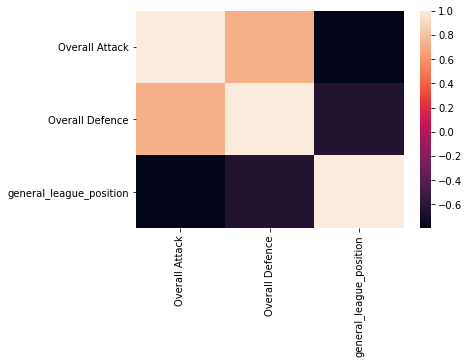

In [359]:
sns.heatmap(dfCreatifity.corr());